In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('max_columns', None)

In [59]:
df1 = pd.read_csv('input/df1.csv',index_col=0)
df2 = pd.read_csv('input/df2.csv')

In [57]:
df1.index

Index(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04', '2000-01-05',
       '2000-01-06', '2000-01-07', '2000-01-08', '2000-01-09', '2000-01-10',
       ...
       '2002-09-17', '2002-09-18', '2002-09-19', '2002-09-20', '2002-09-21',
       '2002-09-22', '2002-09-23', '2002-09-24', '2002-09-25', '2002-09-26'],
      dtype='object', length=1000)

## Style Sheets

Matplotlib has [style sheets](http://matplotlib.org/gallery.html#style_sheets) you can use to make your plots look a little nicer. These style sheets include plot_bmh,plot_fivethirtyeight,plot_ggplot and more. They basically create a set of style rules that your plots follow. I recommend using them, they make all your plots have the same look and feel more professional. You can even create your own if you want your company's plots to all have the same look (it is a bit tedious to create on though).

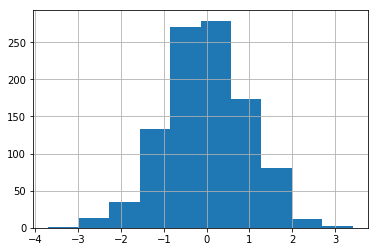

In [3]:
# **Before plt.style.use() your plots look like this:**
df1['A'].hist()

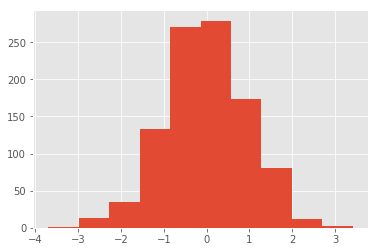

In [4]:
# Now your plots look like this:
plt.style.use('ggplot')
df1['A'].hist()

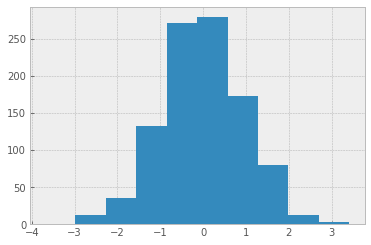

In [5]:
plt.style.use('bmh')
df1['A'].hist()

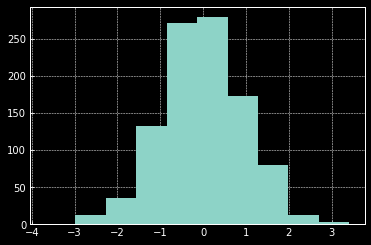

In [6]:
plt.style.use('dark_background')
df1['A'].hist()

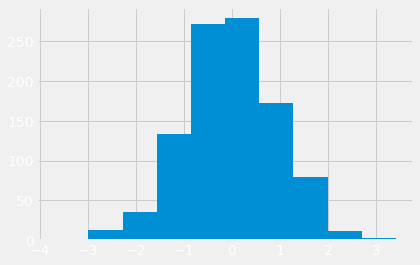

In [7]:
plt.style.use('fivethirtyeight')
df1['A'].hist()

In [8]:
plt.style.use('ggplot')

# Plot Types

There are several plot types built-in to pandas, most of them statistical plots by nature:

* df.plot.area     
* df.plot.barh     
* df.plot.density  
* df.plot.hist     
* df.plot.line     
* df.plot.scatter
* df.plot.bar      
* df.plot.box      
* df.plot.hexbin   
* df.plot.kde      
* df.plot.pie

You can also just call df.plot(kind='hist') or replace that kind argument with any of the key terms shown in the list above (e.g. 'box','barh', etc..)

## Area

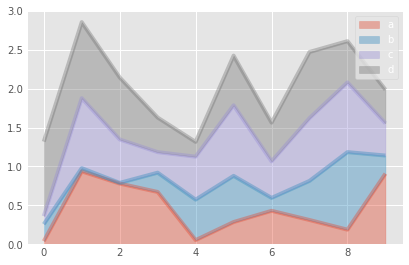

In [9]:
df2.plot.area(alpha=0.4)

## Barplots

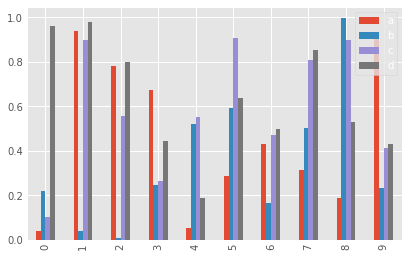

In [10]:
df2.plot.bar()

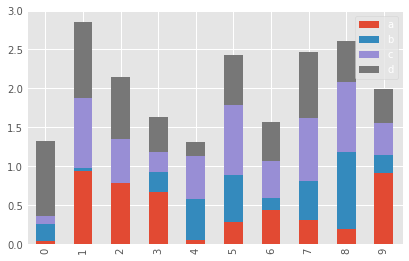

In [11]:
df2.plot.bar(stacked=True)

## Histogram

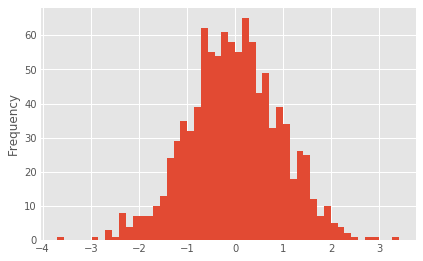

In [12]:
df1['A'].plot.hist(bins=50)

## Line Plots

In [61]:
# df1.plot.line(x=df1.index,y='B',figsize=(12,3),lw=1);

## Scatter Plots

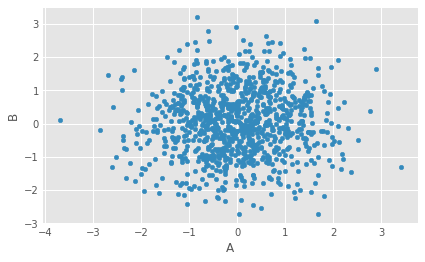

In [62]:
df1.plot.scatter(x='A',y='B')

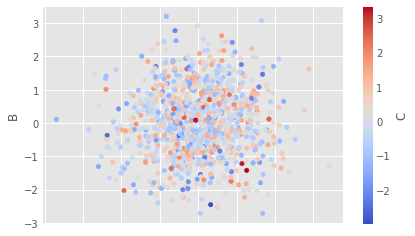

In [63]:
# using color as the 3rd D
df1.plot.scatter(x='A',y='B',c='C',cmap='coolwarm')

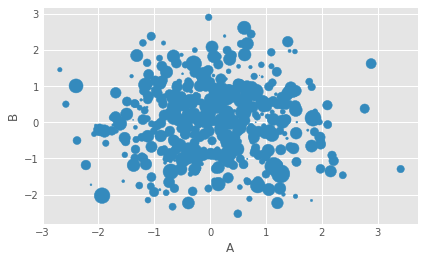

In [65]:
# using size as the 3rd D
df1.plot.scatter(x='A',y='B',s=df1['C']*100)

## BoxPlots

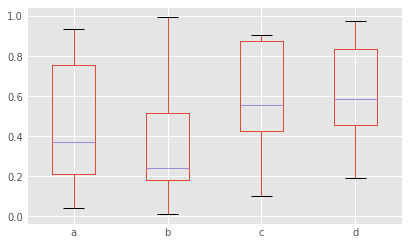

In [66]:
df2.plot.box() # Can also pass a by= argument for groupby

## Hexagonal Bin Plot

Useful for Bivariate Data, alternative to scatterplot:

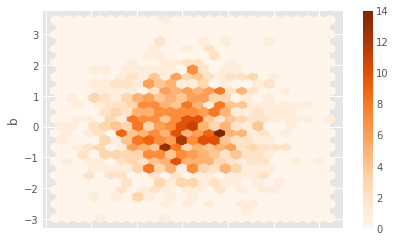

In [67]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df.plot.hexbin(x='a',y='b',gridsize=25,cmap='Oranges')

# Bivariate plotting with pandas

In [68]:
reviews = pd.read_csv("input/winemag-data_first150k.csv", index_col=0)

In [72]:
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


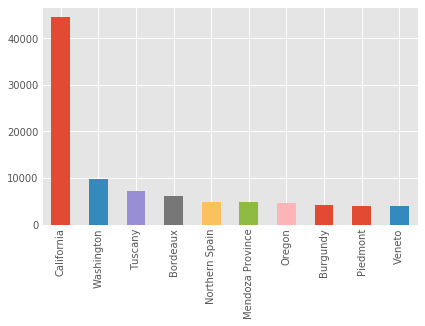

In [69]:
reviews['province'].value_counts().head(10).plot.bar()

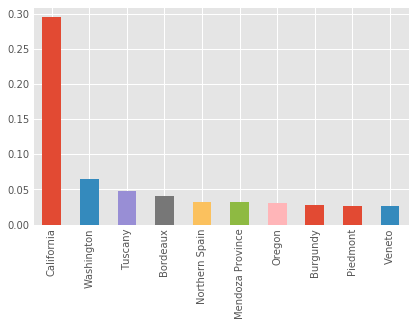

In [70]:
(reviews['province'].value_counts().head(10) / len(reviews)).plot.bar()

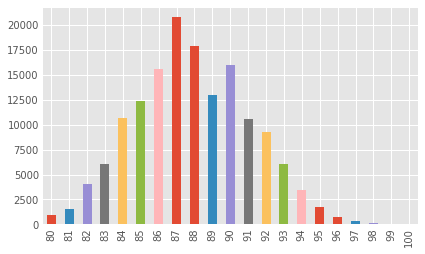

In [71]:
reviews['points'].value_counts().sort_index().plot.bar()

# Line & Area charts

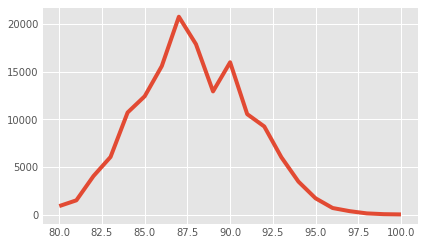

In [73]:
reviews['points'].value_counts().sort_index().plot.line()

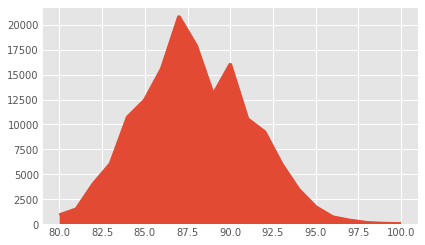

In [74]:
reviews['points'].value_counts().sort_index().plot.area()

# Histograms

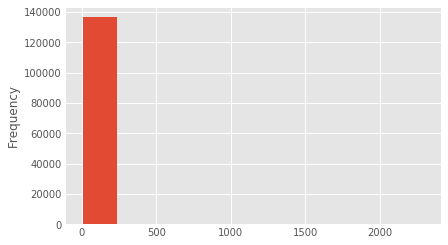

In [76]:
reviews['price'].plot.hist()

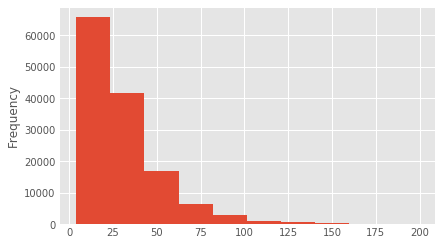

In [75]:
reviews[reviews['price'] < 200]['price'].plot.hist()

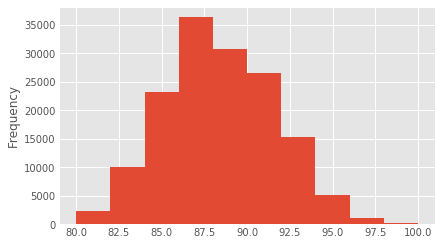

In [77]:
reviews['points'].plot.hist()

# Scatter plot

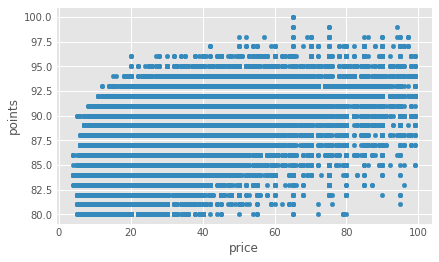

In [79]:
reviews[reviews['price'] < 100].plot.scatter(x='price', y='points')

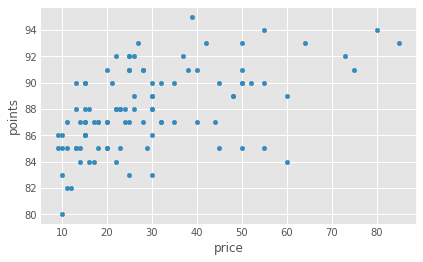

In [78]:
reviews[reviews['price'] < 100].sample(100).plot.scatter(x='price', y='points')

# Hexplot

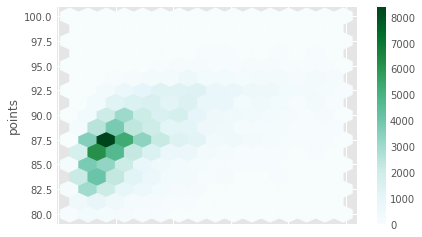

In [81]:
reviews[reviews['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15)

# Stacked plots

In [82]:
wine_counts = pd.read_csv("input/top-five-wine-score-counts.csv", index_col=0)

In [83]:
wine_counts.head()

,Bordeaux-style Red Blend,Cabernet Sauvignon,Chardonnay,Pinot Noir,Red Blend
points,,,,,
80,5.0,87.0,68.0,36.0,72.0
81,18.0,159.0,150.0,83.0,107.0
82,72.0,435.0,517.0,295.0,223.0
83,95.0,570.0,669.0,346.0,364.0
84,268.0,923.0,1146.0,733.0,602.0


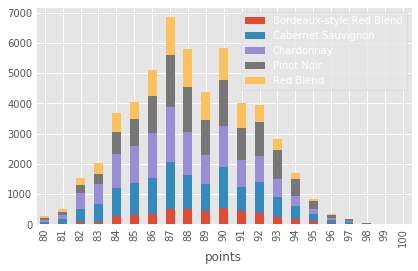

In [85]:
wine_counts.plot.bar(stacked=True);

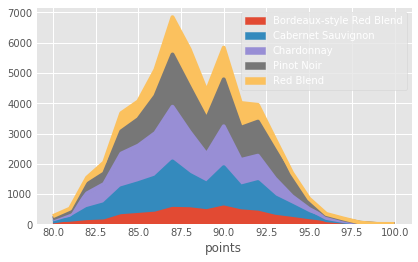

In [87]:
wine_counts.plot.area();

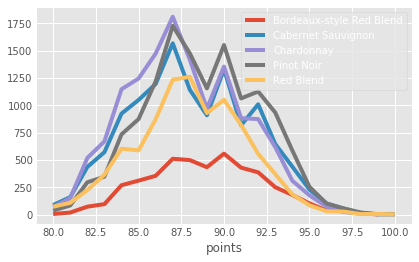

In [89]:
wine_counts.plot.line();

# Points on style

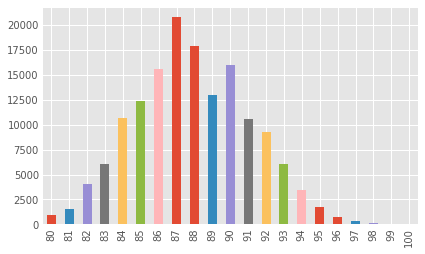

In [91]:
reviews['points'].value_counts().sort_index().plot.bar();

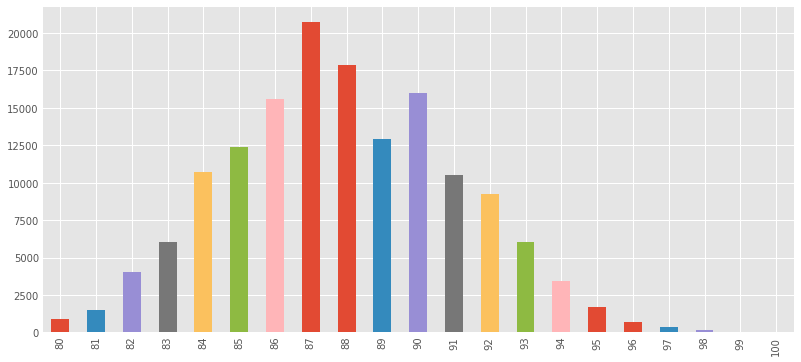

In [92]:
reviews['points'].value_counts().sort_index().plot.bar(figsize=(12, 6))

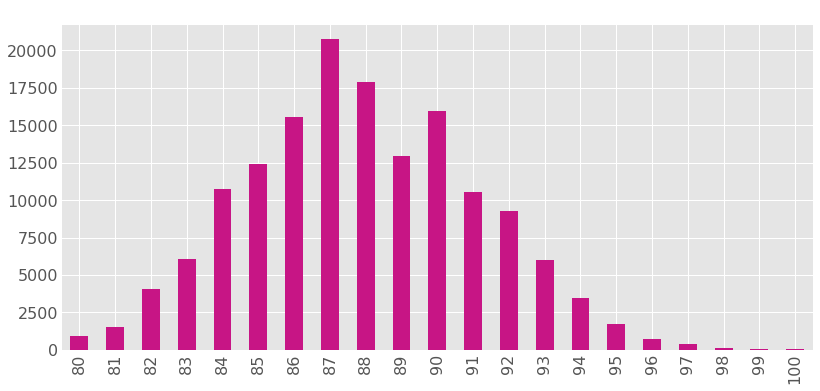

In [101]:
reviews['points'].value_counts().sort_index().plot.bar(
    figsize=(12, 6),
    color='mediumvioletred',
    fontsize=16,
    title='Rankings Given by Wine Magazine',
);

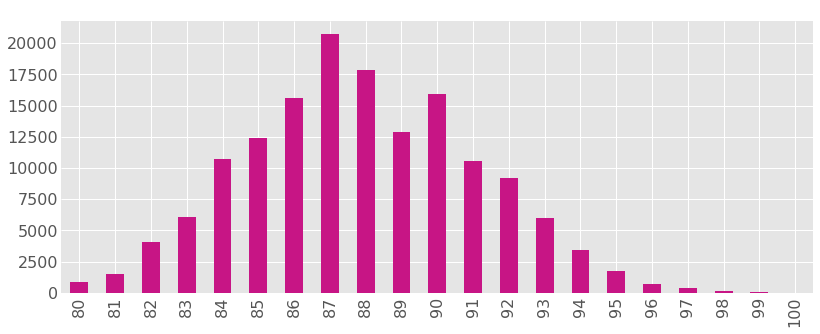

In [98]:
ax = reviews['points'].value_counts().sort_index().plot.bar(
    figsize=(12, 5),
    color='mediumvioletred',
    fontsize=16
)
ax.set_title("Rankings Given by Wine Magazine", fontsize=10)
sns.despine(bottom=True, left=True)

# Subplots

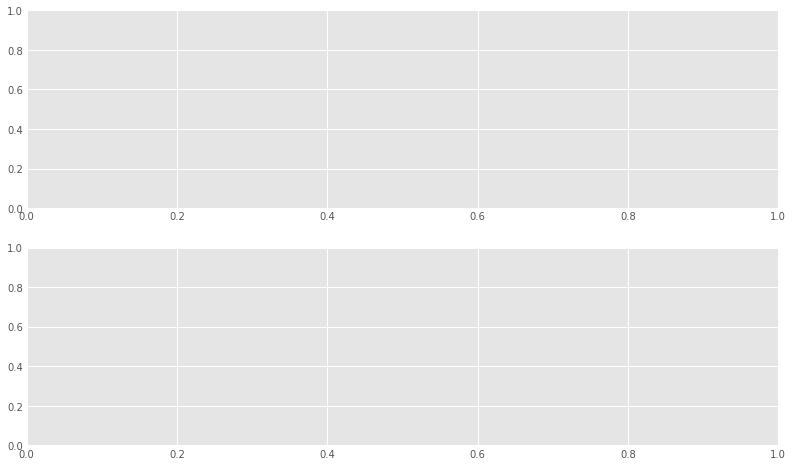

In [102]:
fig, axarr = plt.subplots(2, 1, figsize=(12, 8))

In [103]:
axarr

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12535dc88>,
      dtype=object)

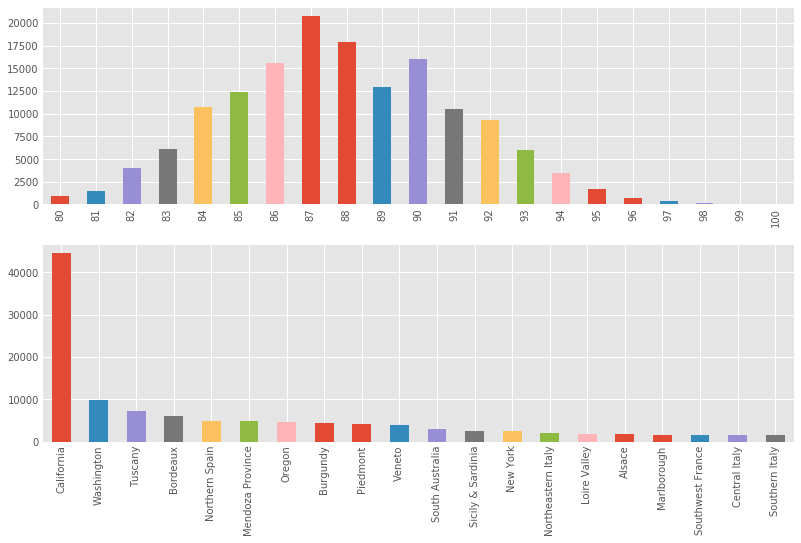

In [104]:
fig, axarr = plt.subplots(2, 1, figsize=(12, 8))

reviews['points'].value_counts().sort_index().plot.bar(
    ax=axarr[0]
)

reviews['province'].value_counts().head(20).plot.bar(
    ax=axarr[1]
)

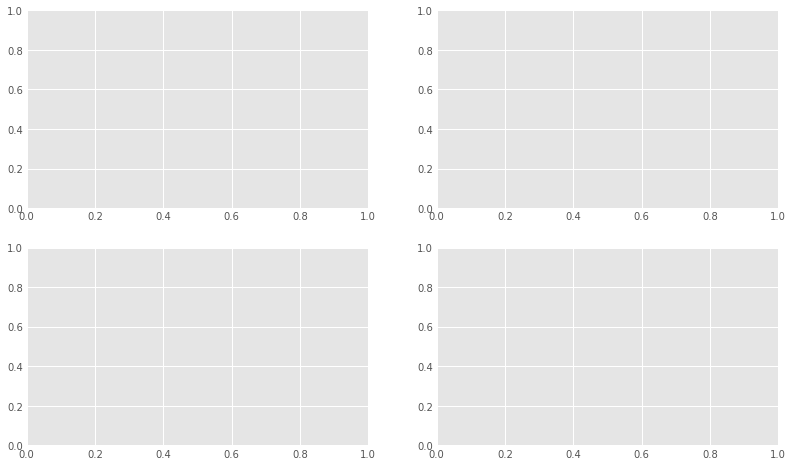

In [105]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

In [106]:
axarr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125c1df60>,
      dtype=object)

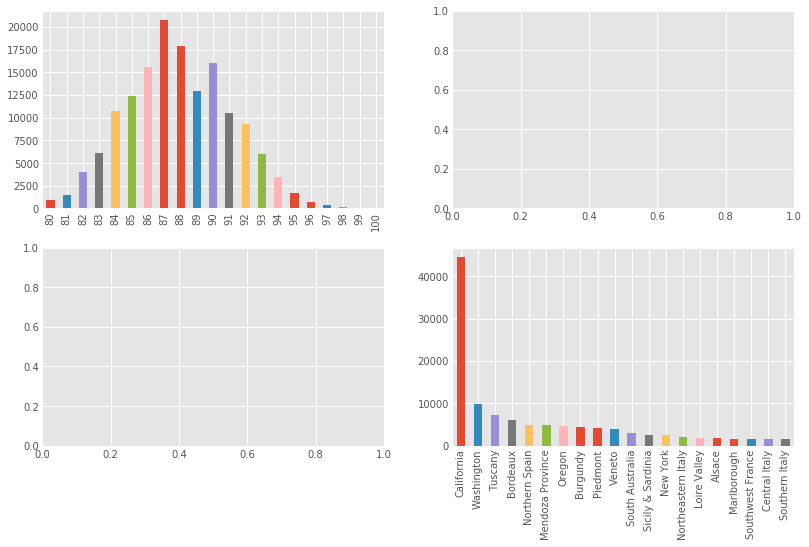

In [108]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

reviews['points'].value_counts().sort_index().plot.bar(
    ax=axarr[0][0]
)

reviews['province'].value_counts().head(20).plot.bar(
    ax=axarr[1][1]
);

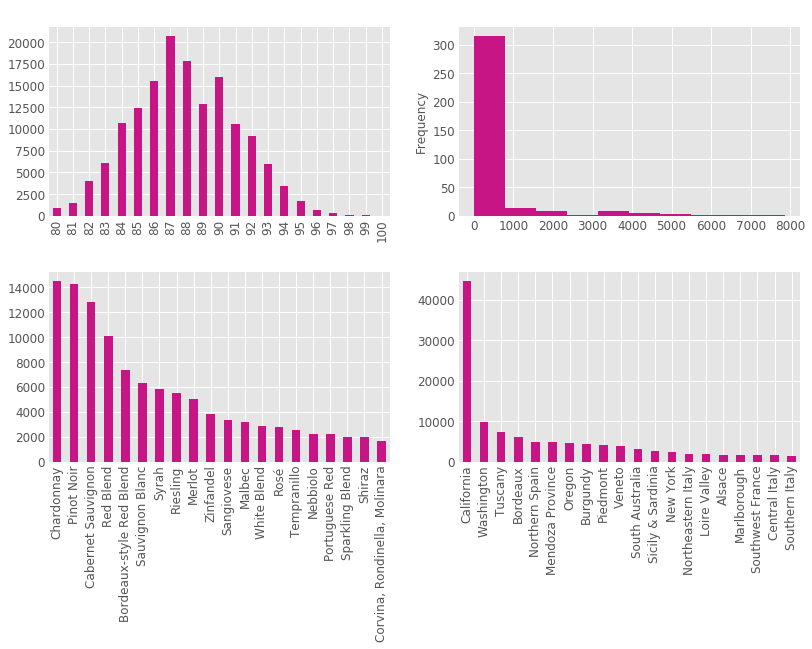

In [109]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

reviews['points'].value_counts().sort_index().plot.bar(
    ax=axarr[0][0], fontsize=12, color='mediumvioletred'
)
axarr[0][0].set_title("Wine Scores", fontsize=18)

reviews['variety'].value_counts().head(20).plot.bar(
    ax=axarr[1][0], fontsize=12, color='mediumvioletred'
)
axarr[1][0].set_title("Wine Varieties", fontsize=18)

reviews['province'].value_counts().head(20).plot.bar(
    ax=axarr[1][1], fontsize=12, color='mediumvioletred'
)
axarr[1][1].set_title("Wine Origins", fontsize=18)

reviews['price'].value_counts().plot.hist(
    ax=axarr[0][1], fontsize=12, color='mediumvioletred'
)
axarr[0][1].set_title("Wine Prices", fontsize=18)

plt.subplots_adjust(hspace=.3)

sns.despine()

# Time-series plotting 

In [3]:
stocks = pd.read_csv("input/prices.csv", parse_dates=['date'])
stocks = stocks[stocks['symbol'] == "GOOG"].set_index('date')
stocks.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,GOOG,626.951088,626.751061,624.241073,629.511067,3927000.0
2010-01-05,GOOG,627.181073,623.991055,621.541045,627.841071,6031900.0
2010-01-06,GOOG,625.861078,608.261023,606.361042,625.861078,7987100.0
2010-01-07,GOOG,609.401025,594.101005,592.651008,610.001045,12876600.0
2010-01-08,GOOG,592.000997,602.021036,589.110988,603.251034,9483900.0


In [4]:
shelter_outcomes = pd.read_csv(
    "input/aac_shelter_outcomes.csv", 
    parse_dates=['date_of_birth', 'datetime']
)
shelter_outcomes = shelter_outcomes[
    ['outcome_type', 'age_upon_outcome', 'datetime', 'animal_type', 'breed', 
     'color', 'sex_upon_outcome', 'date_of_birth']
]
shelter_outcomes.head()

,outcome_type,age_upon_outcome,datetime,animal_type,breed,color,sex_upon_outcome,date_of_birth
0,Transfer,2 weeks,2014-07-22 16:04:00,Cat,Domestic Shorthair Mix,Orange Tabby,Intact Male,2014-07-07
1,Transfer,1 year,2013-11-07 11:47:00,Dog,Beagle Mix,White/Brown,Spayed Female,2012-11-06
2,Adoption,1 year,2014-06-03 14:20:00,Dog,Pit Bull,Blue/White,Neutered Male,2013-03-31
3,Transfer,9 years,2014-06-15 15:50:00,Dog,Miniature Schnauzer Mix,White,Neutered Male,2005-06-02
4,Euthanasia,5 months,2014-07-07 14:04:00,Other,Bat Mix,Brown,Unknown,2014-01-07


## Visualizing by grouping

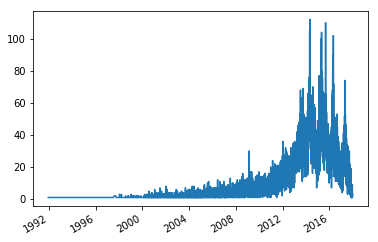

In [5]:
shelter_outcomes['date_of_birth'].value_counts().sort_values().plot.line()

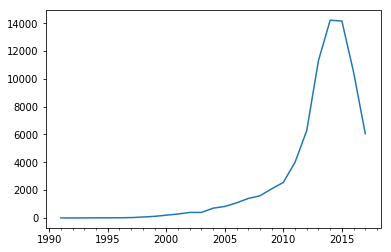

In [6]:
shelter_outcomes['date_of_birth'].value_counts().resample('Y').sum().plot.line()

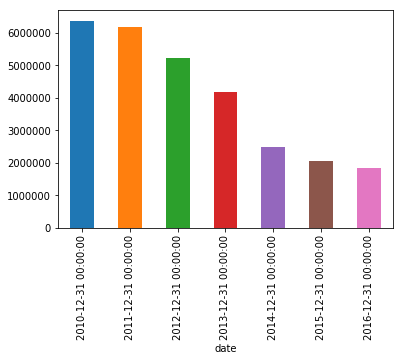

In [7]:
stocks['volume'].resample('Y').mean().plot.bar()

## Lag plot

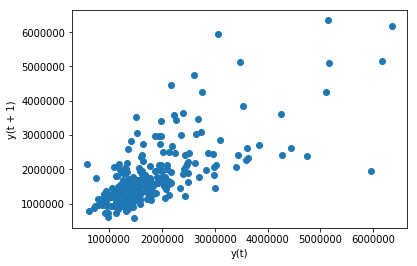

In [8]:
from pandas.plotting import lag_plot

lag_plot(stocks['volume'].tail(250))

## Autocorrelation plot

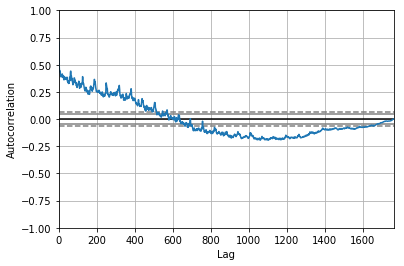

In [9]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(stocks['volume'])